In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [15]:
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [126]:
morph_rare = ['4139265.3','4139265.4','4139265.5'] #,'4139266.3']#,'4222175.0']
morph_familiar = ['4222153.2','4222154.1','4222153.1','4222157.3'] #'4222174.1',
morph_familiar = ['4222153.2','4222153.3','4222153.1','4222174.1']#,'4222154.1','4222157.3']

In [197]:
def U_dict_maker(mlist,first_sess=5,norm = True):
    U_dict = {}
    U_dict['all']={}
    for m,mouse in enumerate(mlist):
        U_dict[mouse]={}
        df_mouse = df[df['MouseName'].str.match(mouse)]
          # for each session
       
        morphs = [0,.25,.5,.75,1]
        for i in morphs:
            for j in morphs:
                U_dict[mouse][(i,j)]=[]
                if m == 0:
                    U_dict['all'][(i,j)]=[]
                
        for mat_ind,sess_ind in enumerate(np.arange(first_sess,df_mouse.shape[0])):
            print("session ind",sess_ind)
            sess = df_mouse.iloc[sess_ind]
             # load session 
            VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
            trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
            
            S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,
                                                                                      bin_size=10,speed=VRDat['speed']._values)
        
             # calculate trial x trial similarity
            S_tm = S_trial_mat.reshape([S_trial_mat.shape[0],-1])
            S_tm/=np.linalg.norm(S_tm,ord=2,axis=1)[:,np.newaxis]
            SM=np.matmul(S_tm,S_tm.T)
            SM[np.diag_indices(S_tm.shape[0])]=np.nan
            if norm:
                SM/=np.nanmean(SM.ravel())
        
             # append data for each morph bin comparison
            for i in morphs:
                for j in morphs:
                    tmp = SM[trial_info['morphs']==i ,:]
                    tmp = tmp[:,trial_info['morphs']==j]
                    U_dict[mouse][(i,j)].extend(tmp.ravel().tolist())
                    U_dict['all'][(i,j)].extend(tmp.ravel().tolist())
                    
    return U_dict
      
        
        
        
        
       
        
        
def perm_meandiff_test(arr0,arr1,nperms = 10000):
    arr0,arr1 = np.array(arr0),np.array(arr1)
    arr0,arr1=arr0[~np.isnan(arr0)],arr1[~np.isnan(arr1)]
    

    split_ind = arr0.shape[0]
    arr_c = np.concatenate((arr0,arr1))
    
    true_diff = np.mean(arr1)-np.mean(arr0)
    
    null_diff = np.zeros([nperms,])
    for p in range(nperms):
        np.random.shuffle(arr_c)
        null_diff[p]=np.mean(arr_c[:split_ind]) - np.mean(arr_c[split_ind:])
        
    return (np.abs(true_diff)<np.abs(null_diff)).sum()/nperms, true_diff




In [144]:
U_rare = U_dict_maker(morph_rare)

session ind 5
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
session ind 6
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
session ind 7
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
session ind 8
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
session ind 9
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
session ind 5
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
session ind 6
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
frame diff 0
session ind 7
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
frame diff 0
session ind 8
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
frame diff 0
session ind 9
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
frame diff 0
session ind 10
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0
session ind 5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
frame diff 0
session ind 6
num aberrant ttls 0.0
36018 (36018,) (36018, 21) 118606
fram

In [136]:
U_fam = U_dict_maker(morph_familiar)

session ind 5
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
session ind 6
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
frame diff 0
session ind 7
num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
frame diff 0
session ind 5
num aberrant ttls 0.0
13661 (13661,) (13661, 21) 44097
frame diff 0
session ind 5
num aberrant ttls 0.0
33778 (33778,) (33778, 21) 111444
frame diff 0
session ind 6
num aberrant ttls 0.0
35977 (35977,) (35977, 21) 118959
frame diff 0
session ind 5
num aberrant ttls 0.0
34560 (34560,) (34560, 21) 97310
frame diff 0
session ind 6
num aberrant ttls 0.0
30879 (30879,) (30879, 21) 86531
frame diff 0
session ind 7
num aberrant ttls 0.0
28286 (28286,) (28286, 21) 80945
frame diff 0
session ind 8
num aberrant ttls 0.0
31882 (31882,) (31882, 21) 91565
frame diff 0


In [198]:
U_rare_n = U_dict_maker(morph_rare,norm=True)
U_fam_n = U_dict_maker(morph_familiar,norm=True)

session ind 5
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
frame diff 0
session ind 6
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
session ind 7
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
session ind 8
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
session ind 9
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
session ind 5
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
session ind 6
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
frame diff 0
session ind 7
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
frame diff 0
session ind 8
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
frame diff 0
session ind 9
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
frame diff 0
session ind 10
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0
session ind 5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
frame diff 0
sess

In [199]:
morphs = [0,.25,.5,.75,1]
pmat = np.ones((len(morphs),len(morphs)))
Dmat = np.ones((len(morphs),len(morphs)))
for row,i in enumerate(morphs):
    for col,j in enumerate(morphs):
        print(row,col)
        p,d = perm_meandiff_test(U_rare_n['all'][(i,j)],U_fam_n['all'][(i,j)])
        print(p,d)
        pmat[row,col],Dmat[row,col]=p,d



0 0
0.0 -0.19613579117635038
0 1
0.0 -0.1529942898287472
0 2
0.0 0.14506323431579682
0 3
0.0 0.1442053139117273
0 4
0.0 0.13281331007185193
1 0
0.0 -0.15299428982874708
1 1
0.0 -0.15407552283711978
1 2
0.0 0.15667819334231237
1 3
0.0 0.14969145056843247
1 4
0.0 0.14243119767624046
2 0
0.0 0.1450632343157967
2 1
0.0 0.1566781933423127
2 2
0.0 -0.09883649622778545
2 3
0.0 -0.11604803673804431
2 4
0.0 -0.1161068645418446
3 0
0.0 0.14420531391172742
3 1
0.0 0.14969145056843225
3 2
0.0 -0.11604803673804431
3 3
0.0 -0.15297006705984773
3 4
0.0 -0.13693725328036543
4 0
0.0 0.13281331007185193
4 1
0.0 0.14243119767624046
4 2
0.0 -0.11610686454184482
4 3
0.0 -0.1369372532803652
4 4
0.0 -0.12916467261640996


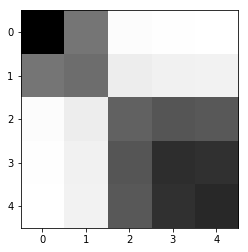

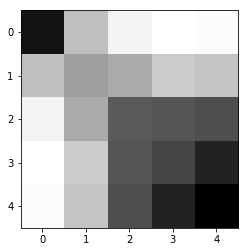

In [217]:
U_mean_rare = np.zeros([5,5])
U_mean_fam = np.zeros([5,5])
for row,i in enumerate(morphs):
    for col,j in enumerate(morphs):
        U_mean_rare[row,col] = np.nanmean(U_rare['all'][(i,j)])
        U_mean_fam[row,col]= np.nanmean(U_fam['all'][(i,j)])
        

f,ax = plt.subplots()
ax.imshow(U_mean_rare,cmap='Greys')#,vmin=0.1,vmax=.2)
f,ax = plt.subplots()
ax.imshow(U_mean_fam,cmap='Greys')#,vmin=0.1,vmax=.2)

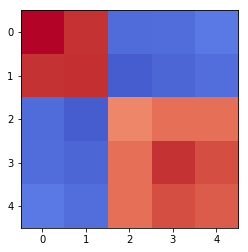

In [201]:
f,ax = plt.subplots()
ax.imshow()
f,ax = plt.subplots()
ax.imshow(-Dmat,cmap='coolwarm',vmin=-.17,vmax=.17)

In [135]:
print(len(U_rare['all'][(0,1)]))

14400


In [112]:

def U_list_maker(mlist,max_pos = 450,first_sess=5):
    U_list = []
    morphs = np.linspace(0,1,num=6)[1:]
    #effMorph_dig = np.digitize(effMorph,morphs,right=True)
    for mouse in mlist: #['4139265.3','4139265.4','4139265.5']:
        df_mouse = df[df['MouseName'].str.match(mouse)]

        for mat_ind,sess_ind in enumerate(np.arange(first_sess,df_mouse.shape[0])):
            print("session ind",sess_ind)
            sess = df_mouse.iloc[sess_ind]

            VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
            trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)


            effMorph = trial_info['morphs'] +  trial_info['wallJitter'] + trial_info['bckgndJitter']
            effMorph= (effMorph-np.amin(effMorph))/(np.amax(effMorph)-np.amin(effMorph))
            msort = np.argsort(effMorph)
            effMorph=effMorph[msort]
            effMorph_dig = np.digitize(effMorph,morphs,right=True)
            #print(effMorph_dig)
            S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,
                                                                                      bin_size=10,speed=VRDat['speed']._values)
            S_trial_mat=S_trial_mat[msort,:,:]
            S_trial_mat=S_trial_mat[:,(centers<=max_pos),:]
            S_tm = S_trial_mat.reshape([S_trial_mat.shape[0],-1])
            #S_tm = sp.stats.zscore(S_tm,axis=1)
            S_tm/=np.linalg.norm(S_tm,ord=2,axis=1)[:,np.newaxis]
            SM=np.matmul(S_tm,S_tm.T)
            SM[np.diag_indices(S_tm.shape[0])]=np.nan

            U_tmp = np.zeros([morphs.shape[0],morphs.shape[0]])

            for row,morph_r in enumerate(range(np.amax(effMorph_dig)+1)):
                for col, morph_c in enumerate(range(np.amax(effMorph_dig)+1)):
                    mask = np.matmul((effMorph_dig==morph_r).reshape([-1,1]),(effMorph_dig==morph_c).reshape([1,-1]))

                    U_tmp[row,col] = np.nanmean( SM[mask].ravel())

            if mat_ind == 0:

                U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],df_mouse.shape[0]-first_sess])

            U[:,:,mat_ind]=U_tmp


        U_list.append(U)
        
    return U_list

In [113]:
U_rare = U_list_maker(morph_rare)
U_fam = U_list_maker(morph_familiar,first_sess=4)

session ind 5
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
frame diff 0
session ind 6
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
session ind 7
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
session ind 8
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
session ind 9
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
session ind 5
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
session ind 6
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
frame diff 0
session ind 7
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
frame diff 0
session ind 8
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
frame diff 0
session ind 9
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
frame diff 0
session ind 10
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0
session ind 5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
frame diff 0
sess

In [40]:
U_rd = U_list_maker(['4139224.2','4139224.3','4139224.5'])

session ind 5
num aberrant ttls 0.0
26741 (26741,) (26741, 20) 83632
frame diff 0


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: Mean of empty slice


session ind 6
num aberrant ttls 0.0
23611 (23611,) (23611, 20) 75002
frame diff 0
session ind 7
num aberrant ttls 0.0
28600 (28600,) (28600, 20) 90254
frame diff 0
session ind 8
num aberrant ttls 0.0
24063 (24063,) (24063, 20) 76746
frame diff 0
session ind 9
num aberrant ttls 0.0
27943 (27943,) (27943, 20) 90302
frame diff 0
session ind 5
num aberrant ttls 0.0
31376 (31376,) (31376, 20) 99274
frame diff 0
session ind 6
num aberrant ttls 0.0
29572 (29572,) (29572, 20) 92598
frame diff 0
session ind 7
num aberrant ttls 0.0
37977 (37977,) (37977, 20) 121175
frame diff 0
session ind 8
num aberrant ttls 0.0
32188 (32188,) (32188, 20) 101194
frame diff 0
session ind 9
num aberrant ttls 0.0
28824 (28824,) (28824, 20) 89367
frame diff 0
session ind 10
num aberrant ttls 0.0
28114 (28114,) (28114, 20) 88941
frame diff 0
session ind 5
num aberrant ttls 0.0
18855 (18855,) (18855, 20) 59619
frame diff 0
session ind 6
num aberrant ttls 0.0
29679 (29679,) (29679, 20) 92950
frame diff 0
session ind 7

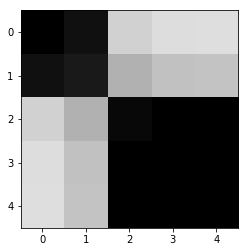

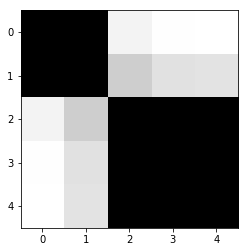

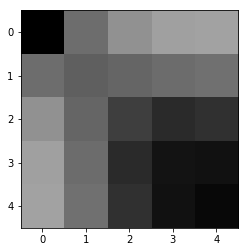

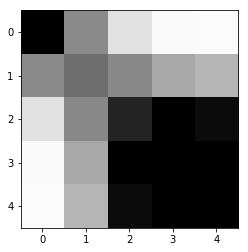

In [114]:

def U_mean_mat(U_list,norm=True):
    U_mean = np.zeros(U_list[0].shape[:-1])
    for mouse in range(len(U_list)):
        U_tmp = U_list[mouse]
        if norm:
            U_mu = U_tmp.mean(axis=-1)
            minn,maxx = np.nanmin(U_mu.ravel()),np.nanmax(U_mu.ravel())
            U_mean  += (U_mu-minn)/(maxx-minn)   
        else:
            U_mean+=np.nanmean(U_tmp,axis=-1)
    U_mean/=mouse
    f_U,ax_U = plt.subplots()
    if norm:
        ax_U.imshow(U_mean,cmap='Greys',vmin=0,vmax=.8)
    else:
        ax_U.imshow(U_mean,cmap='Greys',vmin=0.1,vmax=.2)
    return f_U,ax_U,U_mean
# f_U.savefig("G:\\My Drive\\LabEvening_2019\\MorphSimMat_mean_MorphNaive.pdf",format='pdf')

# f_rd, ax_rd, U_rd_mu = U_mean_mat(U_rd)
# f_rd.savefig('binned_rd.svg',format='svg')

f_rare,ax_rare,U_rare_mu = U_mean_mat(U_rare,norm=False)
f_rare,ax_rare,U_rare_mu_n = U_mean_mat(U_rare)
# f_rare.savefig('binned_rare.svg',format='svg')
#f_rare.savefig("G:\\My Drive\\LabEvening_2019\\trialSM_binned_MorphRare.svg",format='svg')

f_fam, ax_fam,U_fam_mu = U_mean_mat(U_fam,norm=False)
f_fam, ax_fam,U_fam_mu_n = U_mean_mat(U_fam)
# f_fam.savefig('binned_fam.svg',format='svg')
#f_fam.savefig("G:\\My Drive\\LabEvening_2019\\trialSM_binned_MorphFam.svg",format='svg')

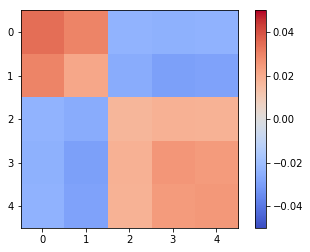

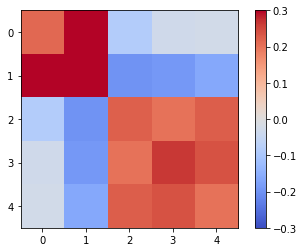

In [115]:
f,ax = plt.subplots()
im = ax.imshow(U_rare_mu-U_fam_mu,cmap='coolwarm',vmin=-.05,vmax=.05)
f.colorbar(im,ax=ax)

f,ax = plt.subplots()
im = ax.imshow(U_rare_mu_n-U_fam_mu_n,cmap='coolwarm',vmin=-.3,vmax=.3)
f.colorbar(im,ax=ax)

# f.savefig('binned_rar_fam_diff.svg',format='svg')

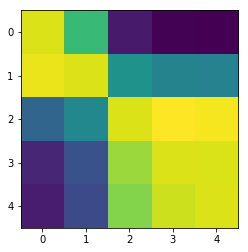

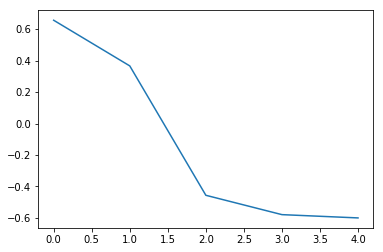

In [117]:
f,ax = plt.subplots()
ax.imshow(np.log(U_rare_mu)-np.log(np.diagonal(U_rare_mu)[:,np.newaxis]))

logD_rare = np.log(U_rare_mu[0,:])-np.log(U_rare_mu[-1,:])
f,ax = plt.subplots()
ax.plot(logD_rare)

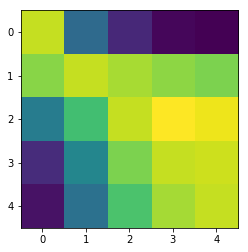

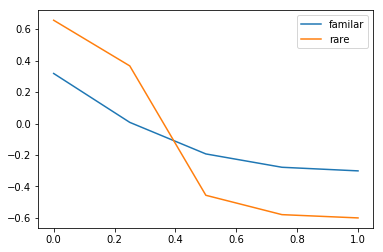

In [119]:
f,ax = plt.subplots()
ax.imshow(np.log(U_fam_mu)-np.log(np.diagonal(U_fam_mu)[:,np.newaxis]))


logD_fam = np.log(U_fam_mu[0,:])-np.log(U_fam_mu[-1,:])
f,ax = plt.subplots()
ax.plot(np.linspace(0,1,num=5),logD_fam)
ax.plot(np.linspace(0,1,num=5),logD_rare)
ax.legend(('familar','rare'))
f.savefig('binned_lar.svg',format='svg')

In [116]:
logD_rd = np.log(U_rd[0,:])-np.log(U_rd[-1,:])
f,ax = plt.subplots()
ax.plot(logD_fam)
ax.plot(logD_rare)
# ax.plot(logD_rd)

NameError: name 'U_rd' is not defined

In [120]:
def U_mouse_plots(U_list,cmap='copper',fax = None):
    cm = plt.cm.get_cmap(cmap)
    if fax is None:
        f,ax = plt.subplots(3,2,figsize=[8,15])
    else:
        f,ax = fax[0],fax[1]
        
    for mouse in range(len(U_list)):
        color = mouse/np.float(len(U_list))
        U_tmp = U_list[mouse]
        
        
        print(U_tmp.shape)
        U_mean = U_tmp.mean(axis=-1)
        U_sem = sp.stats.sem(U_tmp,axis=-1)
        
#         minn,maxx = np.amin(U_mean,axis=1)[:,np.newaxis],np.amax(U_mean,axis=1)[:,np.newaxis]
        minn,maxx = np.amin(U_mean.ravel()),np.amax(U_mean.ravel())
        U_n_mu  = (U_mean-minn)/(maxx-minn) 
        U_n_sem = U_sem/(maxx-minn)
        
        U_lr = np.log(U_tmp[0,:,:])-np.log(U_tmp[-1,:,:])
        U_lr_mu = np.mean(U_lr,axis=-1)
        U_lr_sem = sp.stats.sem(U_lr,axis=-1)
        
#         lr_min,lr_max = np.amin(U_lr_mu),np.amax(U_lr_mu)
#         U_lr_mu_n = (U_lr_mu-lr_min)/(lr_max-lr_min)
#         U_lr_sem_n = U_lr_sem/(lr_max-lr_min)
        U_lr_mu_n = np.log(U_n_mu[0,:])-np.log(U_n_mu[-1,:])
        
        
    
    
        dm = 1/U_tmp.shape[0]
        morphs = np.arange(dm-dm/2,1,dm)
        for ind,m in enumerate([0,-1]): #range(morphs.shape[0]):
            ax[ind,0].fill_between(morphs,U_mean[m,:]+U_sem[m,:],y2=U_mean[m,:]-U_sem[m,:],color=cm(color),alpha=.5)
            ax[ind,0].plot(morphs,U_mean[m,:],color=cm(color))
            ax[ind,0].set_ylim([0.05,.25])
#             ax[ind,0].set_xlim([0,1])
            
            ax[ind,1].fill_between(morphs,U_n_mu[m,:]+U_n_sem[m,:],y2=U_n_mu[m,:]-U_n_sem[m,:],color=cm(color),alpha=.5)
            ax[ind,1].plot(morphs,U_n_mu[m,:],color=cm(color))
            ax[ind,1].set_ylim([-.2,1.2])
            ax[ind,1].set_xlim([0,1])
            
        
        
        ax[2,0].fill_between(morphs,U_lr_mu-U_lr_sem,y2=U_lr_mu+U_lr_sem,color=cm(color),alpha=.5)
        ax[2,1].fill_between(morphs,U_lr_mu_n-0,y2=U_lr_mu_n+0,color=cm(color),alpha=.5)
        
            
            
    return f,ax

(5, 5, 5)
(5, 5, 6)
(5, 5, 5)
(5, 5, 4)
(5, 5, 2)
(5, 5, 3)
(5, 5, 5)


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


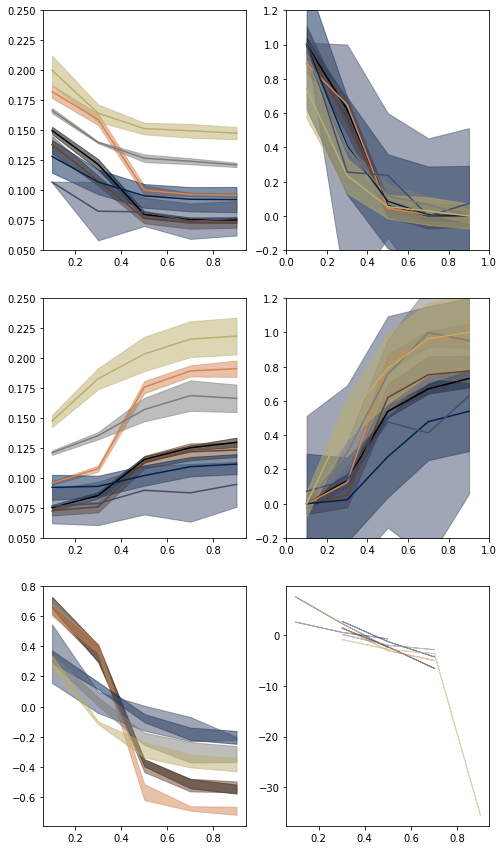

In [121]:
f_rare,ax_rare=U_mouse_plots(U_rare,cmap='copper')
f_fam,ax_fam = U_mouse_plots(U_fam,cmap='cividis',fax=[f_rare,ax_rare])
f_rare.savefig("G:\\My Drive\\LabEvening_2019\\trialSM_rows_MorphRare.svg",format='svg')
f_fam.savefig("G:\\My Drive\\LabEvening_2019\\trialSM_rows_MorphFamiliar.svg",format='svg')

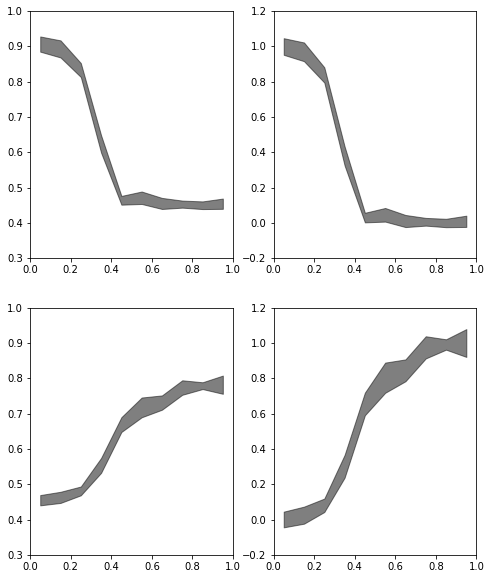

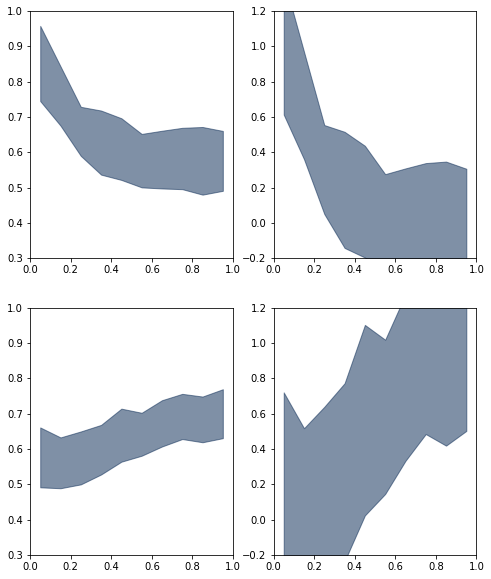

In [65]:
f_rare,ax_rare=U_mouse_plots(U_rare[:1],cmap='copper')
f_fam,ax_fam = U_mouse_plots(U_fam[:1],cmap='cividis')
f_rare.savefig("G:\\My Drive\\LabEvening_2019\\trialSM_rows_MorphRare_1mouse.svg",format='svg')
f_fam.savefig("G:\\My Drive\\LabEvening_2019\\trialSM_rows_MorphFamiliar_1mouse.svg",format='svg')